In [25]:
from scipy.io import loadmat
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

In [26]:
mat_arr = loadmat('../data/imdb_crop/imdb.mat')['imdb']

Possible fields in mat files:
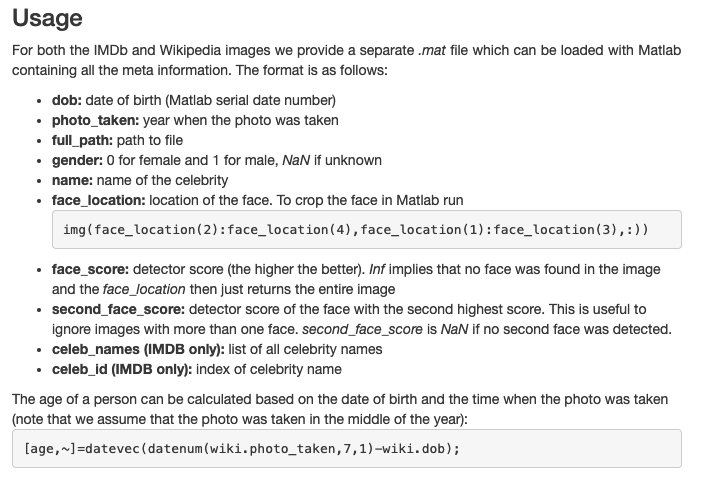

In [49]:
face_coords = mat_arr['face_location'][0][0][0]
face_coords

array([array([[1072.926,  161.838, 1214.784,  303.696]]),
       array([[477.184, 100.352, 622.592, 245.76 ]]),
       array([[114.96964309, 114.96964309, 451.68657236, 451.68657236]]),
       ..., array([[  1,   1, 453, 640]], dtype=uint16),
       array([[144.75225472, 126.76472288, 305.78804127, 287.80050943]]),
       array([[457.524,  41.748, 518.016, 102.24 ]])], dtype=object)

In [28]:
urls = mat_arr['full_path'][0][0][0]
urls = list(map(lambda url: '../data/imdb_crop/'+url[0], urls))
print(len(urls))
urls[:10]

460723


['../data/imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg',
 '../data/imdb_crop/01/nm0000001_rm3343756032_1899-5-10_1970.jpg',
 '../data/imdb_crop/01/nm0000001_rm577153792_1899-5-10_1968.jpg',
 '../data/imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg',
 '../data/imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg',
 '../data/imdb_crop/02/nm0000002_rm1075631616_1924-9-16_1991.jpg',
 '../data/imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg',
 '../data/imdb_crop/02/nm0000002_rm1363385088_1924-9-16_2004.jpg',
 '../data/imdb_crop/02/nm0000002_rm1411175936_1924-9-16_1991.jpg',
 '../data/imdb_crop/02/nm0000002_rm1447271168_1924-9-16_2004.jpg']

In [29]:
photo_taken = mat_arr['photo_taken'][0][0][0]
photo_taken[:10]

array([1968, 1970, 1968, 1968, 1968, 1991, 2004, 2004, 1991, 2004],
      dtype=uint16)

In [30]:
dob = mat_arr['dob'][0][0][0]

In [31]:
year_to_subtr = []
broken_idx = []

In [32]:
for i, matlab_datenum in enumerate(dob):
    try:
        dt = timedelta(days=int(matlab_datenum) -366) + datetime(1,1,1)
        dt_arr = list(dt.timetuple())
        year = dt_arr[0]

        # suppose that photo was taken at 1 of July
        if dt_arr[1] == 7:
            if dt_arr[2] > 1:
                year += 1
        if dt_arr[1] > 7:
            year += 1
        year_to_subtr.append(year)
    except:
        print("broken matlab serial number:", i,  matlab_datenum)
        broken_idx.append(i)
    if (i % 10000) == 0:
         print("record", i+1, "processed, successfully parsed", len(year_to_subtr), 'years... ')

record 1 processed, successfully parsed 1 years... 
record 10001 processed, successfully parsed 10001 years... 
record 20001 processed, successfully parsed 20001 years... 
record 30001 processed, successfully parsed 30001 years... 
record 40001 processed, successfully parsed 40001 years... 
record 50001 processed, successfully parsed 50001 years... 
record 60001 processed, successfully parsed 60001 years... 
record 70001 processed, successfully parsed 70001 years... 
record 80001 processed, successfully parsed 80001 years... 
record 90001 processed, successfully parsed 90001 years... 
record 100001 processed, successfully parsed 100001 years... 
record 110001 processed, successfully parsed 110001 years... 
record 120001 processed, successfully parsed 120001 years... 
record 130001 processed, successfully parsed 130001 years... 
broken matlab serial number: 139296 357
record 140001 processed, successfully parsed 140000 years... 
record 150001 processed, successfully parsed 150000 years.

Вдруг из урла можно получить год рождения

In [33]:
urls[178453], urls[178454]

('../data/imdb_crop/55/nm0005555_rm2332859648_0-11-18_2006.jpg',
 '../data/imdb_crop/55/nm0005555_rm2469698304_0-11-18_2005.jpg')

Дата рождения -- 0_11_18. Видимо, нет. Убираем записи с id из broken_idx

In [50]:
face_coords = np.delete(face_coords,broken_idx)
face_coords = list(map(lambda coords: coords[0], face_coords))
len(face_coords)

460594

In [35]:
urls = np.delete(urls,broken_idx)
len(urls)

460594

In [36]:
len(year_to_subtr)

460594

In [37]:
photo_taken = np.delete(photo_taken,broken_idx)
len(photo_taken)

460594

In [38]:
ages = list(map(lambda taken, yob: taken - yob, photo_taken, year_to_subtr))
ages[:20]

[69,
 71,
 69,
 69,
 69,
 66,
 79,
 79,
 66,
 79,
 83,
 66,
 49,
 82,
 49,
 81,
 81,
 81,
 81,
 79]

In [39]:
def age_to_clusters(age):
    if age < 14:
        return 0
    if age < 26:
        return 1
    if age < 46:
        return 2
    if age < 66:
        return 3
    return 4

In [40]:
clusters = list(map(age_to_clusters, ages))
clusters[:20]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4]

In [41]:
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 10348,  80471, 271432,  84596,  13747]))

In [51]:
result = {}
result['urls'] = urls
result['face_coords'] = face_coords
result['age_cluster'] = clusters


In [52]:
df = pd.DataFrame(result, index=None)
print(df.shape)
df.head(20)

(460594, 3)


,urls,face_coords,age_cluster
0,../data/imdb_crop/01/nm0000001_rm124825600_189...,"[1072.926, 161.838, 1214.7839999999999, 303.69...",4
1,../data/imdb_crop/01/nm0000001_rm3343756032_18...,"[477.184, 100.352, 622.592, 245.76]",4
2,../data/imdb_crop/01/nm0000001_rm577153792_189...,"[114.96964308962852, 114.96964308962852, 451.6...",4
3,../data/imdb_crop/01/nm0000001_rm946909184_189...,"[622.8855056426588, 424.21750383700805, 844.33...",4
4,../data/imdb_crop/01/nm0000001_rm980463616_189...,"[1013.8590023603723, 233.8820422075853, 1201.5...",4
5,../data/imdb_crop/02/nm0000002_rm1075631616_19...,"[686.6768205940973, 458.4672137293982, 1198.10...",4
6,../data/imdb_crop/02/nm0000002_rm1346607872_19...,"[78.23569406558903, 52.335129377059346, 194.25...",4
7,../data/imdb_crop/02/nm0000002_rm1363385088_19...,"[64.30867103752385, 64.30867103752385, 207.267...",4
8,../data/imdb_crop/02/nm0000002_rm1411175936_19...,"[212.7672369223355, 1055.6441846116777, 526.79...",4
9,../data/imdb_crop/02/nm0000002_rm1447271168_19...,"[242.176, 49.664, 278.528, 86.016]",4


In [53]:
with open('../csv/total.csv', mode='w', encoding='utf-8') as f_csv:
    df.to_csv(f_csv)